# UMAP -> SVM on CIFAR-10
Jared Nielsen

In [59]:
from sklearn.datasets import make_moons, load_digits, fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from umap import UMAP

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pickle

from MoonsMLP import MoonsMLP

torch.set_printoptions(precision=4)

UMAP is a consistently worse preprocessor. It groups things into clusters. 1-KNN on the raw pixels gets 95% test accuracy, while UMAP 1-KNN (no dimensionality reduction gets 73% test). UMAP 1-KNN (project to 2 dimensions) gets 83% test.

In [112]:
X, y = load_digits(return_X_y=True)
# res = fetch_olivetti_faces()
# X, y = res['data'], res['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)
print(X_train.shape, X_test.shape)

(89, 64) (1708, 64)


In [115]:
svm = SVC(gamma='scale', kernel='linear')
svm.fit(X_train, y_train)
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)
print(train_acc, test_acc)

1.0 0.8992974238875878


In [116]:
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, -1*np.ones_like(y_test)))
umap.fit(X_all, y_all)
X_train_hat = umap.transform(X_train)
X_test_hat = umap.transform(X_test)

svm.fit(X_train_hat, y_train)
train_acc = svm.score(X_train_hat, y_train)
test_acc = svm.score(X_test_hat, y_test)
print(train_acc, test_acc)

0.8426966292134831 0.8559718969555035


In [117]:
train_accs = []
test_accs = []
domain = [2]
model = KNeighborsClassifier(n_neighbors=5)
for n_components in domain:
    umap = UMAP(n_components=n_components)
    X_all = np.concatenate((X_train, X_test))
    y_all = np.concatenate((y_train, y_test)) #-1*np.ones_like(y_test)))
#     umap.fit(X_all, y_all)
#     X_train_hat = umap.transform(X_train)
#     X_test_hat = umap.transform(X_test)
    model.fit(X_train_hat, y_train)
    train_acc = model.score(X_train_hat, y_train)
    test_acc = model.score(X_test_hat, y_test)
    print("{} components: train {:3f}, test {:.3f}".format(n_components, train_acc, test_acc))
    train_accs.append(train_acc)
    test_accs.append(test_acc)

2 components: train 0.955056, test 0.947


In [81]:
train_accs = []
test_accs = []
domain = list(range(1, 10))
model = KNeighborsClassifier(n_neighbors=1)
# model = SVC(gamma='scale')
for n_components in domain:
    umap = UMAP(n_components=n_components)

    X_all = np.concatenate((X_train, X_test))
    y_all = np.concatenate((y_train, -1*np.ones_like(y_test)))
    X_train_hat = X_train
    X_test_hat = X_test
    umap.fit(X_all, y_all)
    X_train_hat = umap.transform(X_train)
    X_test_hat = umap.transform(X_test)

    model.fit(X_train_hat, y_train)
    train_acc = model.score(X_train_hat, y_train)
    test_acc = model.score(X_test_hat, y_test)
    print("{} components: train {:3f}, test {:.3f}".format(n_components, train_acc, test_acc))
    train_accs.append(train_acc)
    test_accs.append(test_acc)

1 components: train 1.000000, test 0.340
2 components: train 1.000000, test 0.580
3 components: train 1.000000, test 0.680
4 components: train 1.000000, test 0.760
5 components: train 1.000000, test 0.730
6 components: train 1.000000, test 0.710
7 components: train 1.000000, test 0.740
8 components: train 1.000000, test 0.730
9 components: train 1.000000, test 0.700


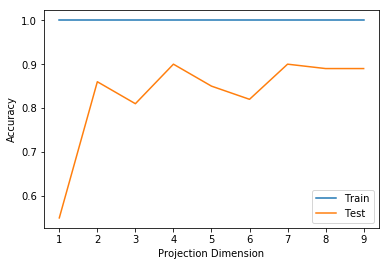

In [80]:
def plot_accs():
    plt.plot(domain, train_accs, label='Train')
    plt.plot(domain, test_accs, label='Test')
    plt.legend()
    plt.xlabel('Projection Dimension')
    plt.ylabel("Accuracy")
    plt.show()
    
plot_accs()

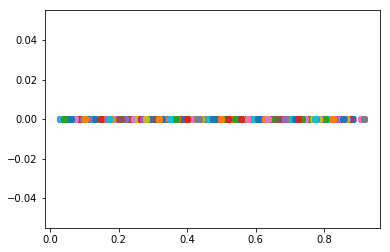

In [92]:
for i in range(10):
    indices = y[y == i]
    plt.plot(X[indices], y[indices], 'o')
plt.show()